# Investigate a Dataset : No-show appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The no-show appointments is a sample that contains information about 100K medical appointments in brazil. It provides several patiant charectaristics to study and predict wither a pationt would show up to their schedualed appointment or not.
In this report, the data will be analysed to find out if some patients charesteristics such gender, age, and SMS reminders affect whether or not they show up for their appointment.

In [2]:
# import the libraries needed for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Load the data and print out a few lines.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I printed out the first five rows of the data set. There are some coulmns that we don't need in this analysis like 'patientId', 'AppointmentID', 'schedualedDay', 'AppointmentDay' and 'Neighbourhood'. I think it would be better to trim those columns in the data cleaning section. 

In [4]:
# Get the size of the data set.

df.shape

(110527, 14)

In [4]:
# Get info about data types and the count of missing values in each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check if there are duplicated rows

df.duplicated().sum()

0

### Data Cleaning

There are no duplicated rows to drop or missing values to replace. I will only drop the unneccary columns for this analysis. 

In [4]:
# drop unneccary columns

df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis= 1, inplace= True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Does sending SMS messages to reminde the patiants of their appointments increases the probability of the patinats showing up?

In [7]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# creating masks for patiants who showed up and patiants who did not show up.

show_up = df['No-show'].str.match('No') #returns boolean
no_show = df['No-show'].str.match('Yes') #returnes boolean
show_up.sum() , no_show.sum()

(88208, 22319)

88208 showed up and 22319 did not.

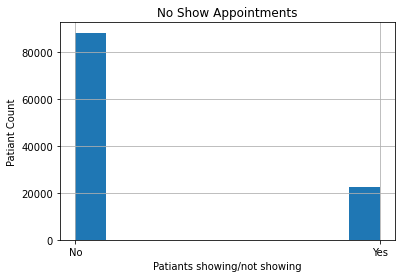

In [15]:
df['No-show'].hist()
plt.title('No Show Appointments')
plt.xlabel('Patiants showing/not showing')
plt.ylabel('Patiant Count');

The majority of the patiants in this dataset showed up to their appointments and very few did not show. Maybe those who did not show up did not recive SMS messages? 

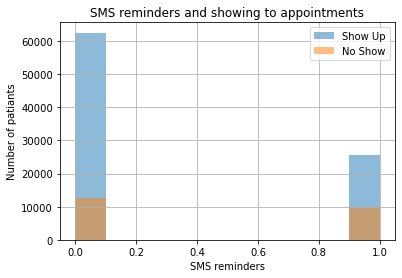

In [19]:
df.SMS_received[show_up].hist(alpha=0.5, label= 'Show Up')
df.SMS_received[no_show].hist(alpha=0.5, label= 'No Show')
plt.legend()
plt.xlabel('SMS reminders')
plt.ylabel('Number of patiants')
plt.title('SMS reminders and showing to appointments');

Among the patiants who did not show up, nearly half of them recived SMS messages. And the majority of patinats showed up despite not receving an SMS. So apparantly there is no correlation between the two variables.  

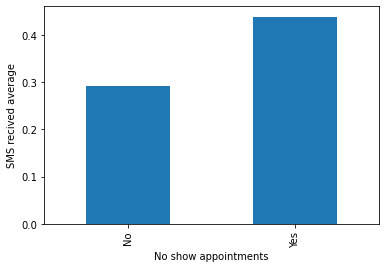

In [20]:
df.groupby('No-show').SMS_received.mean().plot(kind='bar')
plt.xlabel('No show appointments')
plt.ylabel('SMS recived average');

The average of patiants who recived SMS is higher in those who did not show up.

### Q2: Is there any association between the gender of the patiant and showing up to the appointment? 

In [15]:
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

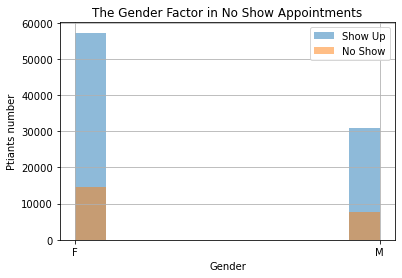

In [24]:
df.Gender[show_up].hist(alpha=0.5, label= 'Show Up')
df.Gender[no_show].hist(alpha=0.5, label= 'No Show')
plt.legend()
plt.title('The Gender Factor in No Show Appointments')
plt.xlabel('Gender')
plt.ylabel('Ptiants number');

More females show up to the schedualed appointment than males, however, in this dataset the number of females is approximately twice the number of males as shown in the histogram below:

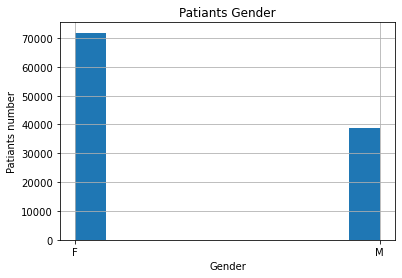

In [40]:
df.Gender.hist()
plt.xlabel('Gender')
plt.ylabel('Patiants number')
plt.title('Patiants Gender');

In [34]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

This means we can not make any associations between gender and showing up to the appointments without being biased.

### Q3: Is there any association between the age of the patiant and showing up to the appointment?

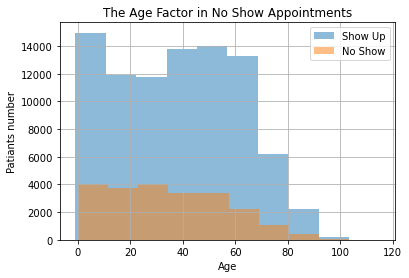

In [39]:
df.Age[show_up].hist(alpha=0.5, label= 'Show Up')
df.Age[no_show].hist(alpha=0.5, label= 'No Show')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Patiants number')
plt.title('The Age Factor in No Show Appointments');

The majority of the patiants are aged between 10 and 60 years old. Few of them are in their 70s, 80s, and 90s. Based on the histogram above, there is clearly no correlation between age and showing/not showing to the appointment. 

### General exeploration of the dataset:

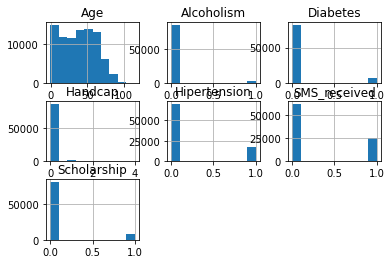

In [20]:
df[show_up].hist();

The majority of patiants who showed up do not suffer from deiabetes, alcoholism, hipertension, handcap. Most of them did not recive an SMS message and do not have a scholarship.  

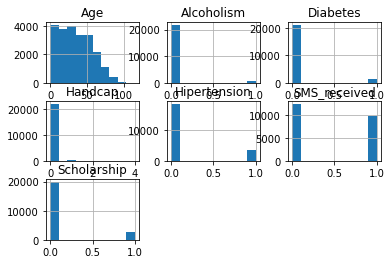

In [21]:
df[no_show].hist();

Also, those who did not show up appear to have the same charactiristics as those who did.

<a id='conclusions'></a>
## Conclusions


In conculsion, this analysis was made to help predict whether a patiant will show up to the schedualed appointment or not based on three factors, such as SMS reminders, gender, and age. After exploring the data, it showed that there is no correlation between reciving SMS and showing up to the appointment. Many of those who showed up did not receive any messages. The age variable also does not have any association with showing/not showing to the appointmen. Regarding the gender, more females showed up to the appointment than males. However, it would be biased to conclude that an association exist between gender and showing up becuase females are nearly twice the number of males in this dataset. In general, those who showed up and those who didn't appear to have the same charactiristics. 

### Refrences

https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/